In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv');
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1994-01-03,3615.199951,3654.699951,3581.000000,3654.500000,3654.496338,0.0,0
1,1994-01-04,3654.500000,3675.500000,3625.100098,3630.300049,3630.296387,0.0,1
2,1994-01-05,3625.199951,3625.199951,3583.399902,3621.199951,3621.196289,0.0,1
3,1994-01-06,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1994-01-07,3621.199951,3644.399902,3598.699951,3636.399902,3636.396240,0.0,1


In [3]:
data.shape

(6554, 8)

In [4]:
# Verificar caracteristicas de las variables y nro de NaNs
data.describe()

,Open,High,Low,Close,Adj Close,Volume,Target
count,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6.421000e+03,6554.000000
mean,8936.540448,9005.235576,8858.340567,8934.978558,8934.970624,8.218074e+07,0.516936
std,2732.102441,2749.009324,2712.511028,2731.032625,2731.030170,1.231845e+08,0.499751
min,2865.100098,2877.300049,2833.600098,2865.100098,2865.097168,0.000000e+00,0.000000
25%,7732.399902,7817.200195,7641.500000,7727.799805,7727.791992,0.000000e+00,0.000000
50%,9329.700195,9404.599609,9243.000000,9331.000000,9331.000000,1.966000e+05,1.000000
75%,10525.500000,10590.299805,10441.200195,10523.400391,10523.400391,1.773980e+08,1.000000
max,15999.200195,16040.400391,15868.599609,15945.700195,15945.683594,7.894902e+08,1.000000


In [5]:
data = data.dropna(axis = 0, how = "any")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1994-01-03,3615.199951,3654.699951,3581.000000,3654.500000,3654.496338,0.0,0
1,1994-01-04,3654.500000,3675.500000,3625.100098,3630.300049,3630.296387,0.0,1
2,1994-01-05,3625.199951,3625.199951,3583.399902,3621.199951,3621.196289,0.0,1
4,1994-01-07,3621.199951,3644.399902,3598.699951,3636.399902,3636.396240,0.0,1
5,1994-01-10,3655.199951,3678.199951,3655.199951,3660.600098,3660.596436,0.0,1


In [6]:
data.shape

(6421, 8)

In [7]:
data.groupby("Target").size()

Target
0    3033
1    3388
dtype: int64

In [8]:
import datetime as dt

In [9]:
# Convertir fecha a formato numerico empezando desde 0
def date_to_int(data):
    data2 = data;
    data2["Date"] = pd.to_datetime(data["Date"])
    data2["Date"] = data2["Date"].map(dt.datetime.toordinal)
    d0 = 727931; # Valor correspondiente a 1994-01-03;
    data2["Date"] = np.array(data2["Date"]).reshape(-1,1) - d0*np.ones([len(data2),1])
    return data2

In [10]:
data = date_to_int(data)

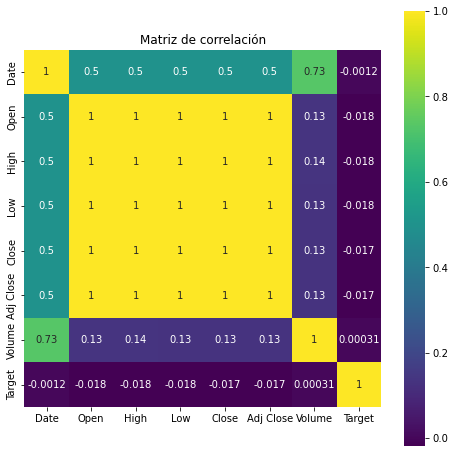

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), vmax = 1, square = True, annot = True, cmap = "viridis")
plt.title("Matriz de correlación")
plt.show()

In [12]:
columns = data.columns.values.tolist()
X = data[columns[:-1]]
Y = data[columns[-1]]

## Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_selection import RFE

In [14]:
 tree = DecisionTreeClassifier(criterion = "entropy", min_samples_split = 10, random_state = 99)

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [16]:
cv = KFold(n_splits = 20, shuffle = True, random_state = 1)

In [17]:
tree.fit(X,Y)
scores = cross_val_score(tree, X, Y, scoring = "accuracy", cv = cv, n_jobs = 1)
scores.mean()

0.6467855691646833

## Predicción

In [18]:
test = pd.read_csv("test_x.csv")
test.head()

,test_index,Date,Open,High,Low,Close,Adj Close,Volume
0,6557,2019-06-05,9136.799805,9173.400391,9095.000000,9150.500000,9150.500000,158753000.0
1,6558,2019-06-06,9169.200195,9246.200195,9136.700195,9169.200195,9169.200195,212720900.0
2,6559,2019-06-07,9186.700195,9261.400391,9185.700195,9236.099609,9236.099609,150664700.0
3,6560,2019-06-10,9284.200195,9302.200195,9248.099609,9294.099609,9294.099609,102323700.0
4,6561,2019-06-11,9288.599609,9332.500000,9273.400391,9282.099609,9282.099609,144701200.0


In [19]:
test = date_to_int(test)
test.head()

,test_index,Date,Open,High,Low,Close,Adj Close,Volume
0,6557,9284.0,9136.799805,9173.400391,9095.000000,9150.500000,9150.500000,158753000.0
1,6558,9285.0,9169.200195,9246.200195,9136.700195,9169.200195,9169.200195,212720900.0
2,6559,9286.0,9186.700195,9261.400391,9185.700195,9236.099609,9236.099609,150664700.0
3,6560,9289.0,9284.200195,9302.200195,9248.099609,9294.099609,9294.099609,102323700.0
4,6561,9290.0,9288.599609,9332.500000,9273.400391,9282.099609,9282.099609,144701200.0


In [20]:
columns = test.columns.values.tolist()
predictors = columns[1:]
predictors

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [33]:
Y_pred = tree.predict(X[predictors])

## Creacion de archivos

In [22]:
with open("prediction.csv", "w") as outfile1:
    for i in range(len(Y_pred)):
        outfile1.write(str(Y_pred[i]))
        outfile1.write("\n")

In [23]:
import json

In [24]:
Y_pred_str = []
for i in Y_pred:
    Y_pred_str.append(str(i))
Y_pred_str[0]

'0'

In [25]:
with open('prediction.json', 'w') as outfile2:
    json.dump(Y_pred_str, outfile2)